In [1]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# in case of path errors: set working directoy manually to your location of c18-virus-model/results with:
# os.chdir("YOUR_PATH_TO_PROJECT/c18-virus-model/results")

In [2]:
# Generating DataFrame over simulations
df_10 = pd.read_csv("output.csv")
df_10["participation"] = df_10["name"].apply(lambda x: int(x[7:].split(sep = "_")[0]))
df_10["trial"] = df_10["name"].apply(lambda x: int(x.split(sep = "_")[1]))
df_10.sort_values(by = ["participation", "trial"], inplace = True)

## Table of results

In [3]:
# displaying first rows of results:
df_10.head()

,id,name,Death count,Total infected,Total tests,Positive Tests,Negative Tests,Peak Infected,Peak Quarantined,Peak Infected Quarantined,Peak Healthy Quarantined,Peak Infected Not Quarantined,Peak Difference Healthy to Infected Quarantined,participation,trial
0,1,Tracing0_0,4.0,706.0,457.0,457.0,0.0,307.0,122.0,83.0,54.0,244.0,12.0,0,0
1,2,Tracing0_1,13.0,727.0,453.0,453.0,0.0,342.0,124.0,99.0,45.0,267.0,16.0,0,1
2,3,Tracing0_2,8.0,711.0,463.0,463.0,0.0,315.0,118.0,85.0,50.0,249.0,8.0,0,2
3,4,Tracing0_3,5.0,710.0,475.0,475.0,0.0,296.0,110.0,86.0,50.0,227.0,13.0,0,3
4,5,Tracing0_4,9.0,734.0,504.0,504.0,0.0,380.0,150.0,116.0,67.0,308.0,14.0,0,4


## Generating interactive Plots

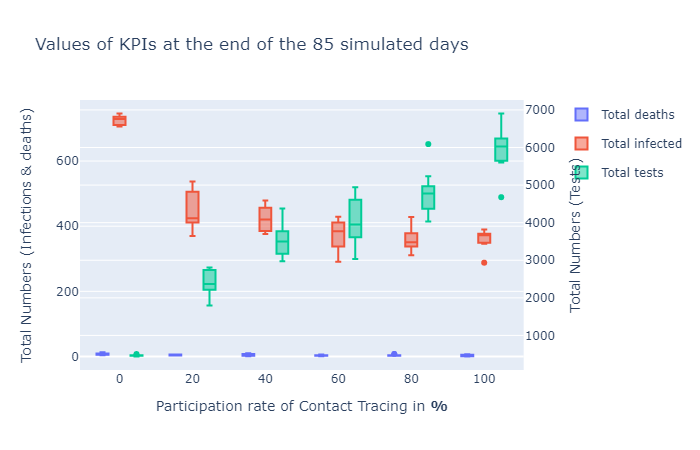

In [10]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Box(x=df_10["participation"], y=df_10['Death count'],
                         name = 'Total deaths',
                       legendgroup='Total deaths'))
fig.add_trace(go.Box(x=df_10["participation"], y=df_10['Total infected'],
             name = 'Total infected',
                       legendgroup='Total infected'))

fig.add_trace(go.Box(x=df_10["participation"], y=df_10['Total tests'],
              name = 'Total tests', 
                       legendgroup='Total tests'),
             secondary_y = True)
fig.update_layout(title_text = "Values of KPIs at the end of the 85 simulated days")
fig.update_layout(boxmode='group')
fig.update_yaxes(title_text= "Total Numbers (Infections & deaths)", secondary_y=False)
fig.update_yaxes(title_text= "Total Numbers (Tests)", secondary_y=True)
fig.update_xaxes(title_text="Participation rate of Contact Tracing in <b>%</b> ")
fig.update_layout(
    autosize=False,
    width=800,
    height=800
)
fig.show()
# fig.show("png")
# fig.write_html("plots/Total_KPIs_Box.html")


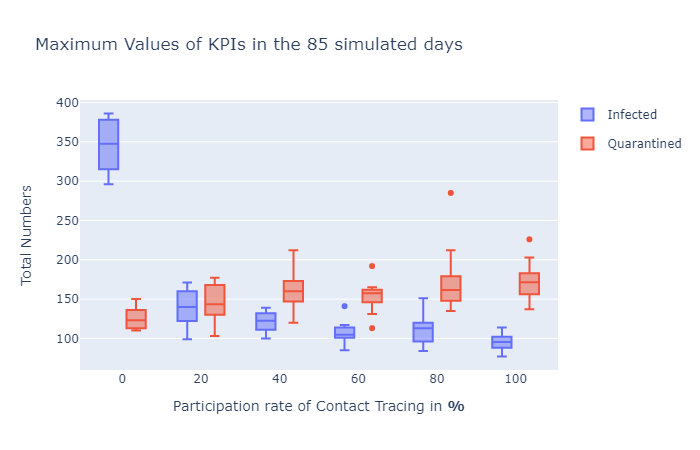

In [17]:
fig = go.Figure()
fig.add_trace(go.Box(x=df_10["participation"], y=df_10['Peak Infected'],
             name = 'Infected',
                       legendgroup='Infected'))
fig.add_trace(go.Box(x=df_10["participation"], y=df_10['Peak Quarantined'],
                         name = 'Quarantined',
                        legendgroup='Quarantined'))

fig.update_layout(title_text = "Maximum Values of KPIs in the 85 simulated days")
fig.update_layout(boxmode='group')
fig.update_yaxes(title_text= "Total Numbers")
fig.update_xaxes(title_text="Participation rate of Contact Tracing in <b>%</b> ")
fig.update_layout(
    autosize=True,
    width=800,
    height=800
)
fig.show()
# fig.show("png")
# fig.write_html("plots/Peak_KPIs1_Box.html")

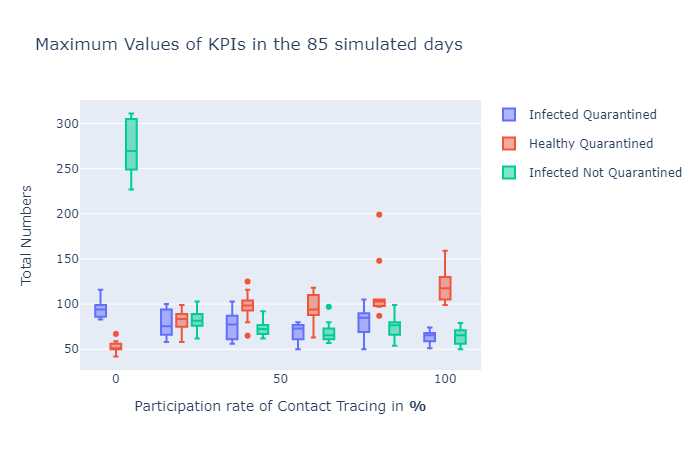

In [12]:
fig = go.Figure()
fig.add_trace(go.Box(x=df_10["participation"], y=df_10['Peak Infected Quarantined'],
              name = 'Infected Quarantined',
                       legendgroup='Infected Quarantined'))
fig.add_trace(go.Box(x=df_10["participation"], y=df_10['Peak Healthy Quarantined'],
             name = 'Healthy Quarantined',
                       legendgroup='Healthy Quarantined'))
fig.add_trace(go.Box(x=df_10["participation"], y=df_10['Peak Infected Not Quarantined'],
                         name = 'Infected Not Quarantined',
                       legendgroup='Infected'))
fig.update_layout(title_text = "Maximum Values of KPIs in the 85 simulated days")
fig.update_layout(boxmode='group')
fig.update_yaxes(title_text= "Total Numbers")
fig.update_xaxes(title_text="Participation rate of Contact Tracing in <b>%</b> ")
fig.update_layout(
    autosize=False,
    width=800,
    height=800
)
fig.show()
# fig.show("png")
# fig.write_html("plots/Peak_KPIs2_Box.html")